<a href="https://colab.research.google.com/github/burapauq/burapa-chiwpreecha/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Bank_Churn_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Burapa Chiwpreecha 643040756-1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from subprocess import check_output

import warnings
warnings.filterwarnings('ignore')

def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')

In [ ]:
URL = 'https://raw.githubusercontent.com/burapauq/DataSci/main/train.csv'
df = pd.read_csv(URL)

In [ ]:
df.shape

(165034, 14)

In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(include='object')

,Surname,Geography,Gender
count,165034,165034,165034
unique,2797,3,2
top,Hsia,France,Male
freq,2456,94215,93150


### Response Rate:

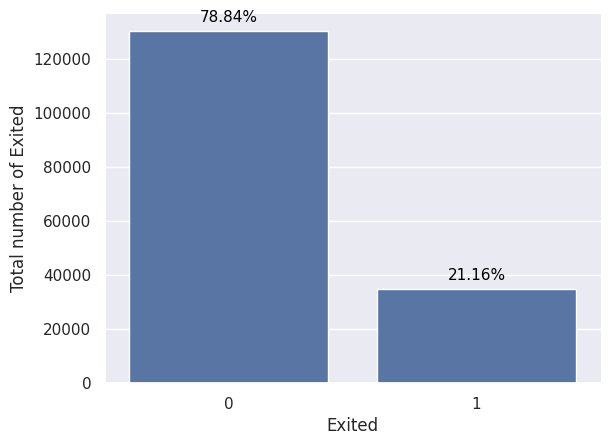

In [ ]:
ax = sns.countplot(x=df["Exited"])
plt.ylabel('Total number of Exited')
annot_plot(ax, 0.08,1)
plt.show()

1. สังเกตว่า ลูกค้าที่ยังใช้งานบัญชีต่อ (Exites = 0) มีประมาณ 78.84% และลูกค้าที่ปิดบัญชี (Exites = 0) มีประมาณ 21.16%

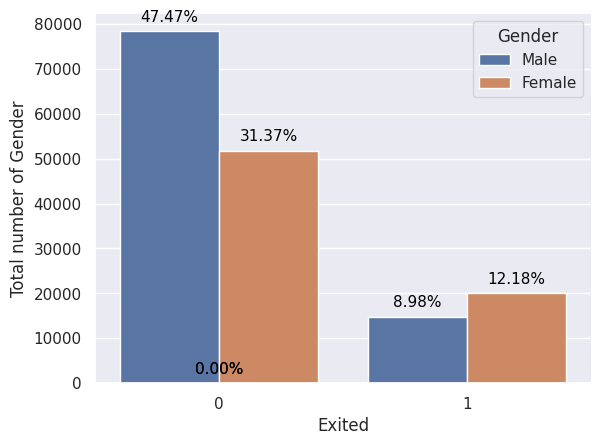

In [ ]:
ax = sns.countplot(data=df, x="Exited", hue="Gender")
plt.ylabel('Total number of Gender')
annot_plot(ax, 0.08,1)
plt.show()

   Gender  Exited  count  total    percent
0  Female       0  51779  71884  72.031328
2    Male       0  78334  93150  84.094471


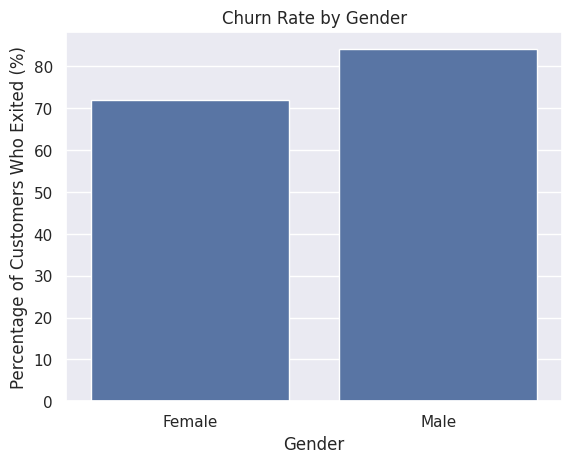

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สมมติ df คือ DataFrame ที่มีคอลัมน์ 'Gender' และ 'Exited'

# 1. สร้างตารางนับจำนวนลูกค้าแยกตามเพศและสถานะ Exited
counts = df.groupby(['Gender', 'Exited']).size().reset_index(name='count')

# 2. คำนวณจำนวนลูกค้าทั้งหมดในแต่ละเพศ
total_by_gender = df.groupby('Gender').size().reset_index(name='total')

# 3. รวมข้อมูลเข้าด้วยกันเพื่อคำนวณ %
merged = counts.merge(total_by_gender, on='Gender')
merged['percent'] = merged['count'] / merged['total'] * 100

# 4. กรองข้อมูลเฉพาะลูกค้ายกเลิก (Exited=1)
churn_percent = merged[merged['Exited'] == 1]

print(churn_percent)

# 5. วาดกราฟเปรียบเทียบ % การยกเลิกตามเพศ
sns.barplot(data=churn_percent, x='Gender', y='percent')
plt.ylabel('Percentage of Customers Who Exited (%)')
plt.title('Churn Rate by Gender')
plt.show()

2.  

> Q : ลูกค้าเพศใดที่มีแนวโน้มปิดบัญชีมากที่สุด?

> A : สังเกตว่า ลูกค้าที่มีการปิดบัญชี (Exited = 1) ส่วนมาก คือ เพศหญิง คิดเป็นประมาณ 12% จาก 21%



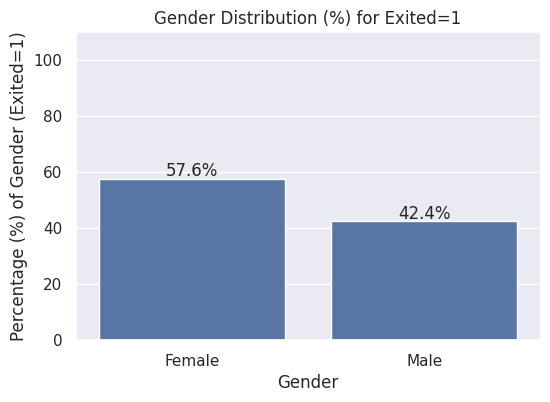

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# กรองข้อมูล Exited == 0
df_exit0 = df[df['Exited'] == 1]

# นับจำนวนแต่ละเพศในกลุ่ม Exited=0
count_gender = df_exit0['Gender'].value_counts()

# คำนวณ % ของแต่ละเพศ
percent_gender = count_gender / count_gender.sum() * 100

# สร้าง DataFrame สำหรับ plot
import pandas as pd
plot_df = pd.DataFrame({'Gender': percent_gender.index, 'Percent': percent_gender.values})

# วาด barplot
plt.figure(figsize=(6,4))
ax = sns.barplot(data=plot_df, x='Gender', y='Percent')

# ใส่ label % บน bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.1f}%', ha="center")

plt.ylabel('Percentage (%) of Gender (Exited=1)')
plt.title('Gender Distribution (%) for Exited=1')
plt.ylim(0, 110)
plt.show()

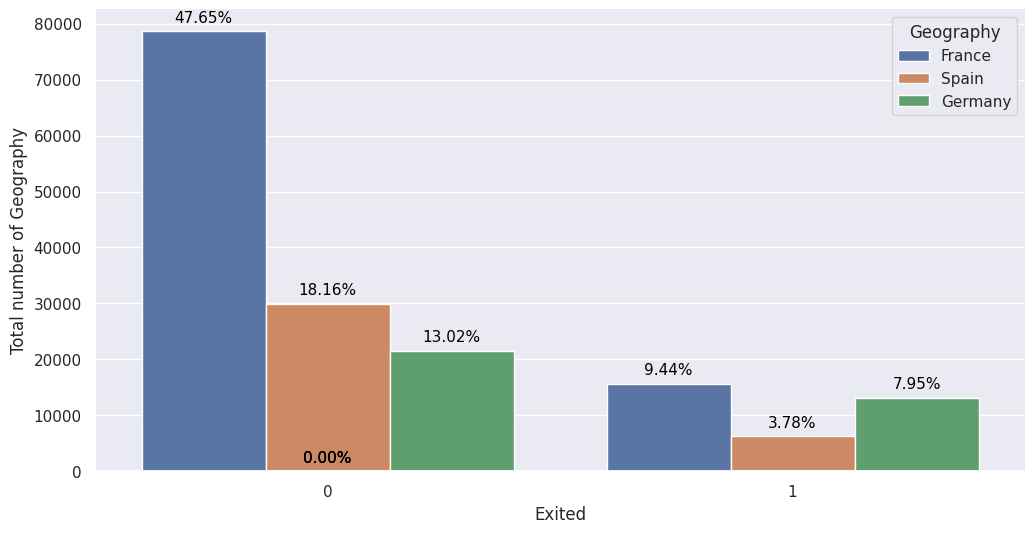

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Exited", hue="Geography")
plt.ylabel('Total number of Geography')
annot_plot(ax, 0.08,1)
plt.show()

3.


>Q : ลูกค้าที่อาศัยในประเทศใดที่มีการจะปิดบัญชีน้อยที่สุด?

> A : สังเกตว่า ลูกค้าที่อาศัยในประเทศฝรั่งเศสไม่ค่อยมีการปิดบัญชี (Exited = 0) คิดเป็น ประมาณ 48% จาก 79%





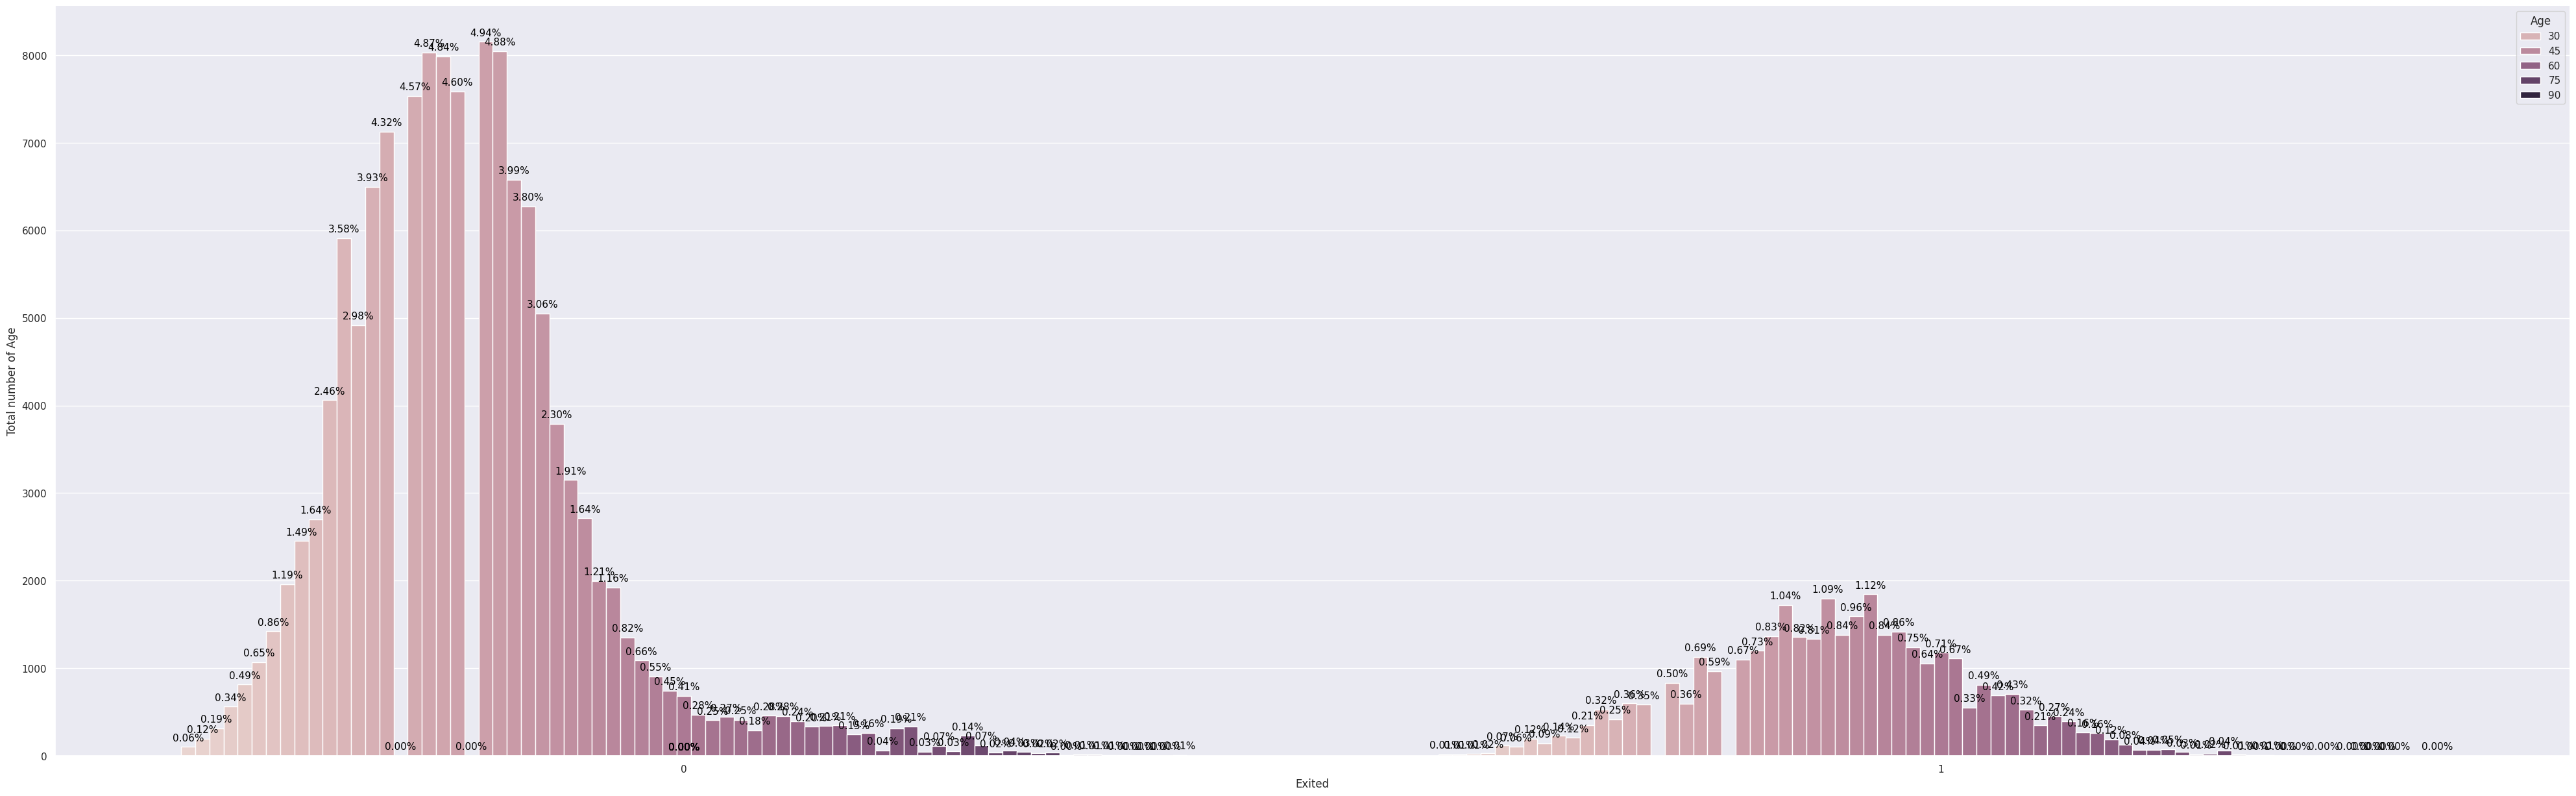

In [ ]:
plt.figure(figsize=(50,15))
ax = sns.countplot(data=df, x="Exited", hue="Age")
plt.ylabel('Total number of Age')
annot_plot(ax, 0.010,1)
plt.show()

4.



>Q : ช่วงอายุของลูกค้าที่มีแนวโน้มปิดบัญชีมากที่สุด?


>A : สังเกตว่า ลูกค้าที่มีการปิดบัญชีมากที่สุด (Exited = 1) คือ ช่วงอายุประมาณ 45 ถึง 60 ปี และลูกค้าไม่ค่อยปิดบัญชี (Exited = 0 ) คือ ช่วงอายุประมาณ 30 ถึง 45 ปี



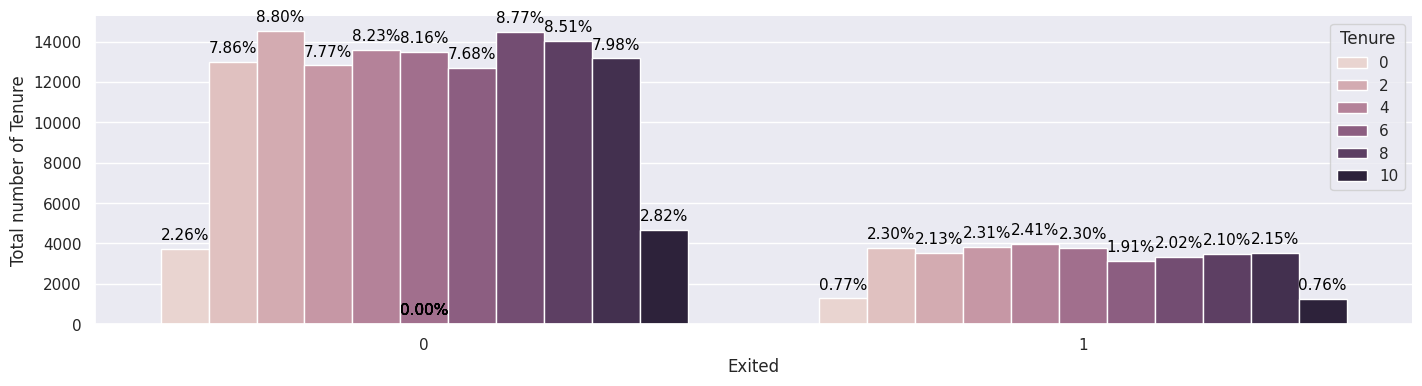

In [ ]:
plt.figure(figsize=(17,4))
ax = sns.countplot(x='Exited',hue = 'Tenure' ,data = df)
plt.ylabel('Total number of Tenure')
annot_plot(ax, 0.08,1)
plt.show()

5.



> Q : ลูกค้าที่เป็นสามาชิกธนาคารมาแล้วกี่ปีถึงจะมีแนวโน้มปิดบัญชีมากที่สุด?

> A : สังเกตว่า ลูกค้าที่มีระยะการเป็นสมาชิก 2 ถึง 4 ปี มีการปิดบัญชีมากที่สุด (Exited = 1)


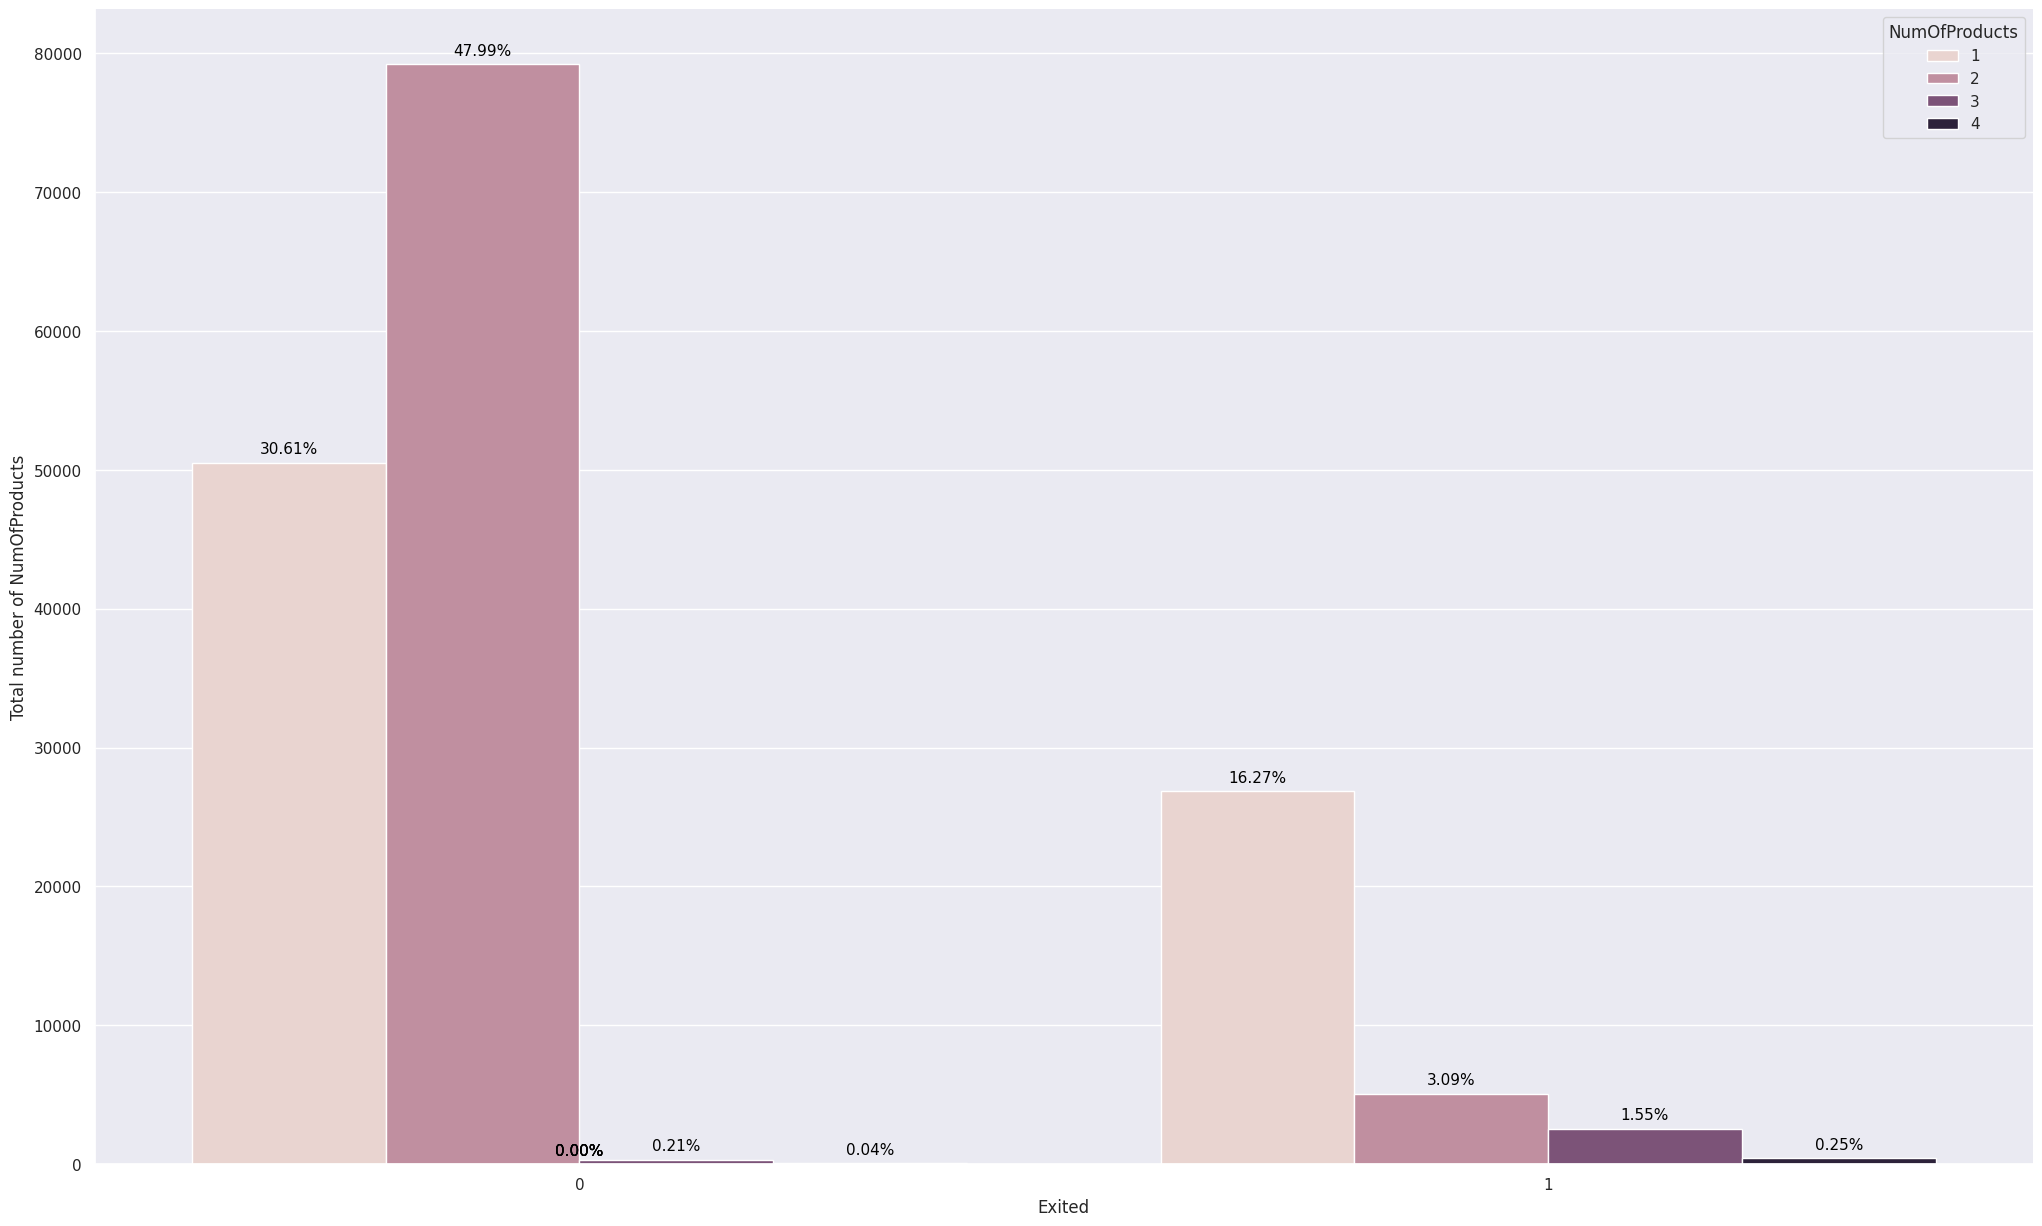

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x='Exited',hue = 'NumOfProducts' ,data = df)
plt.ylabel('Total number of NumOfProducts')
annot_plot(ax, 0.08,1)
plt.show()

6.




>Q : ลูกค้าเป็นสมาชิกผลิตภัณฑ์ของธนาคารจำนวนเท่าใดที่มีแนวโน้มปิดบัญชีมากที่สุด


>A : สังเกตว่า ลูกค้าที่เป็นสมาชิกผลิตภัณฑ์ของธนาคารจำนวน 1 ผลิตภัณฑ์ มีการปิดบัญชีมากที่สุด (Exited = 1) คิดเป็นประมาณ 16% จาก 21%






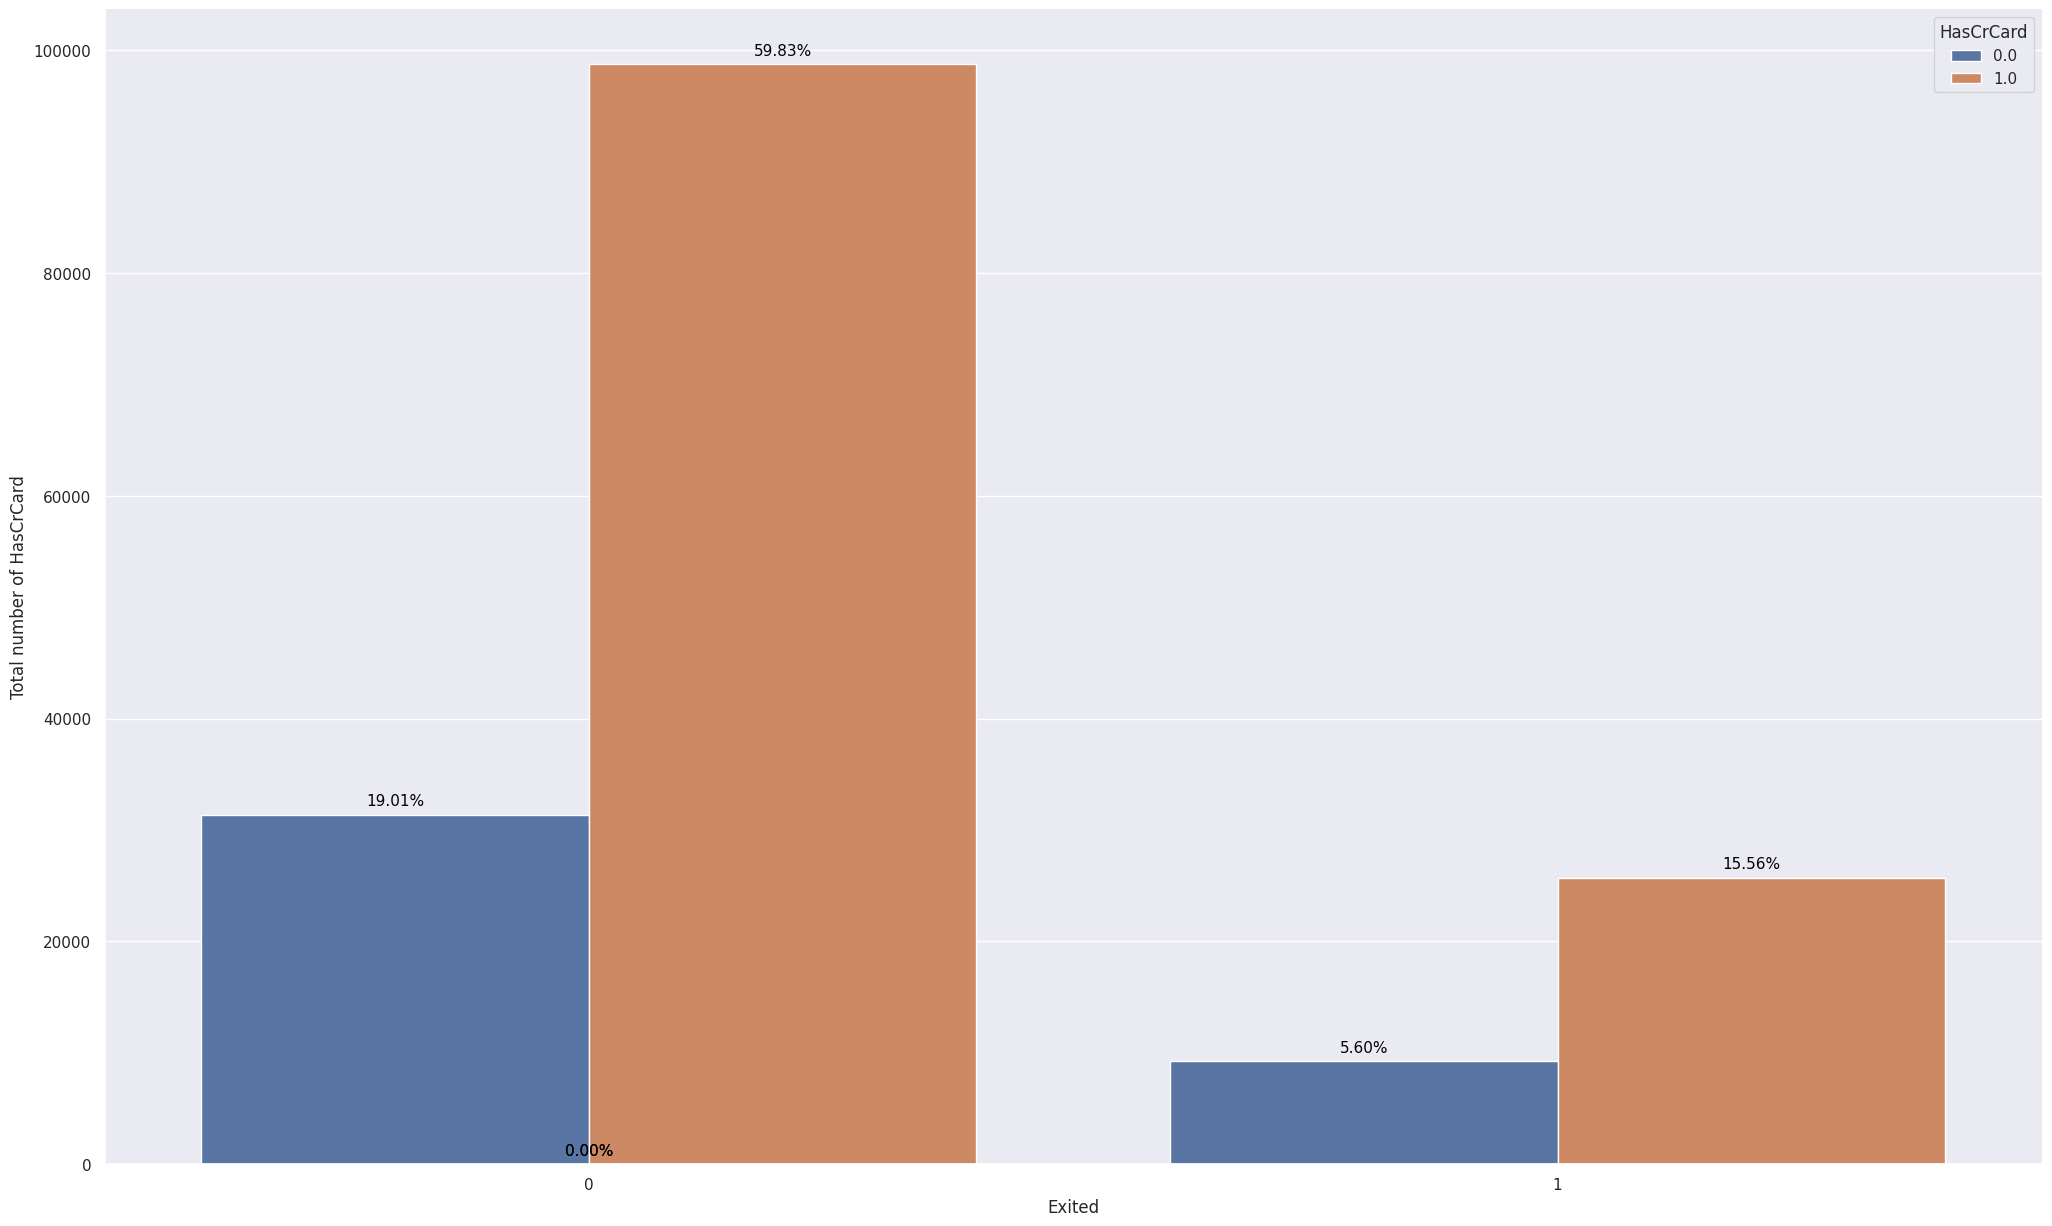

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x='Exited',hue = 'HasCrCard' ,data = df)
plt.ylabel('Total number of HasCrCard')
annot_plot(ax, 0.08,1)
plt.show()

7.



> Q : ลูกค้าที่มีแนวโน้มปิดบัญชีมากที่สุดมีมีบัตรเครดิตหรือไม่?


>A : สังเกตว่า ลูกค้าที่มีบัตรเครดิต (กราฟแท่งสีสัม) มีลักษณะเหมือนกัน ทั้งกรณีที่ไม่ปิดบัญชี (Exited = 0) และกรณีที่ปิดบัญชี(Exited = 1)







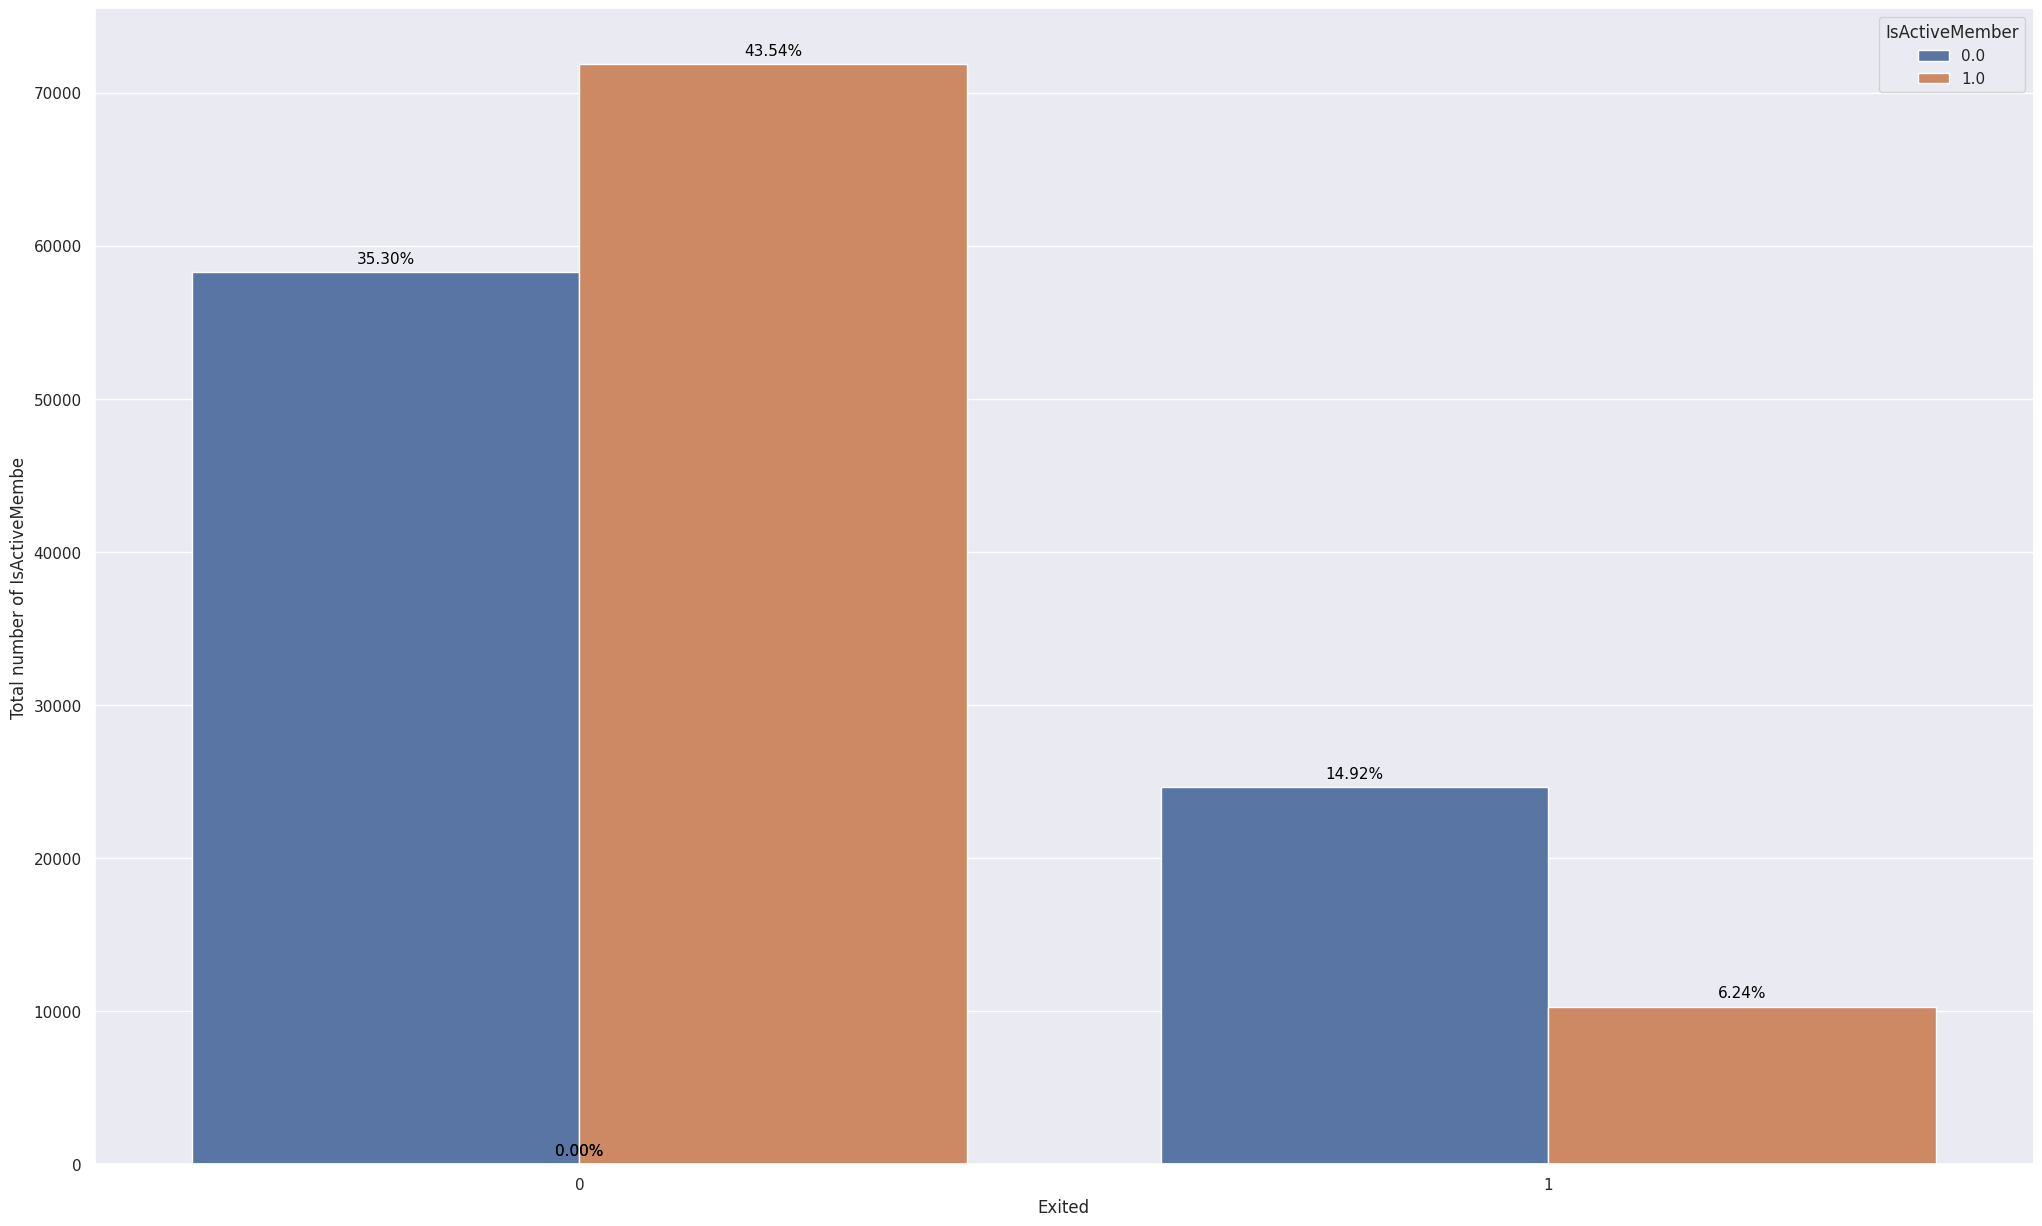

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x='Exited',hue = 'IsActiveMember' ,data = df)
plt.ylabel('Total number of IsActiveMembe')
annot_plot(ax, 0.08,1)
plt.show()

8.


>Q : ลูกค้าไม่มีการเคลื่อนไหวของการเป็นสมาชิกจะปิดบัญชีหรือไม่?



>A : สังเกตว่า ลูกค้าที่ไม่มีการเคลื่อนไหวของการเป็นสมาชิก (IsActiveMember = 0) มีการปิดบัญชี (Exited = ) สูง



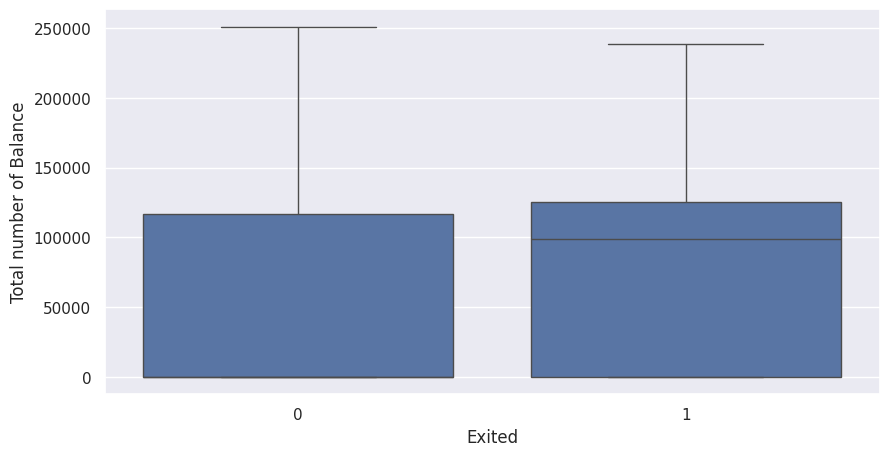

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y = 'Balance' , x = 'Exited', data = df)
plt.ylabel('Total number of Balance')
plt.show()

9.


>Q : ระหว่างลูกค้าที่มียอดเงินในบัญชีสูงและลูกค้าที่มียอดเงินในบัญชีต่ำ ลูกค้ากลุ่มไหนที่จะไม่ปิดบัญชี?



> A : สังเกตว่า เมื่อยอดเงินคงเหลือในบัญชีของลูกค้าสูงขึ้นทำให้มีแนวโนมสูงที่ลูกค้าจะไม่ปิดบัญชี (Exited = 0)





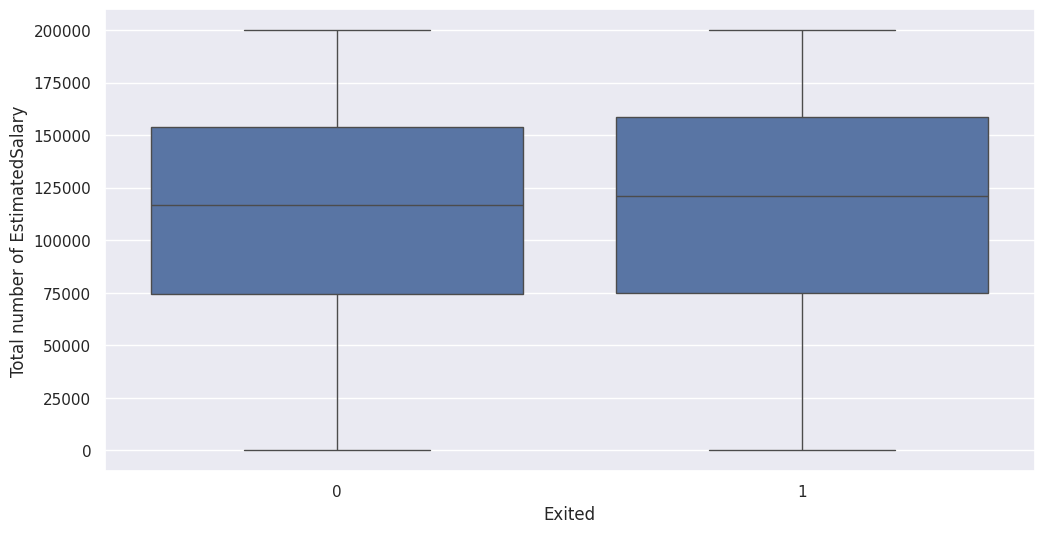

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'EstimatedSalary' , x = 'Exited', data = df)
plt.ylabel('Total number of EstimatedSalary')
plt.show()

10.



> Q : ระหว่างลูกค้าที่มีเงินเดือนสูง หรือเงินเดือนต่ำ ลูกค้ากลุ่มไหนที่จะไม่ปิดบัญชี?


>A : สังเกตว่า เงินเดือนเฉลี่ยของลูกค้าที่มีการปิดบัญชี (Exited = 1) และลูกค้าที่ไม่ปิดบัญชี (Exited = 0 ) มีความใกล้เคียงกัน

